In [ ]:
import kagglehub
import pandas as pd
import os
from matplotlib import pyplot as plt

# dpwnload the dataset
path = kagglehub.dataset_download("andrewmvd/steam-reviews")

# create a correct path by using os
csv_path = os.path.join(path, 'dataset.csv')

df = pd.read_csv(csv_path)

In [2]:
# sanitize fields
df.dropna(subset=['app_name'], inplace=True)
# group by game name and count reviews for each game and put it under 'review_count' column
review_count_df = df.groupby('app_name').size().reset_index(name='review_count')
# sort the results
most_reviews_df = review_count_df.sort_values('review_count', ascending=False)
top_10_games = most_reviews_df.head(10)

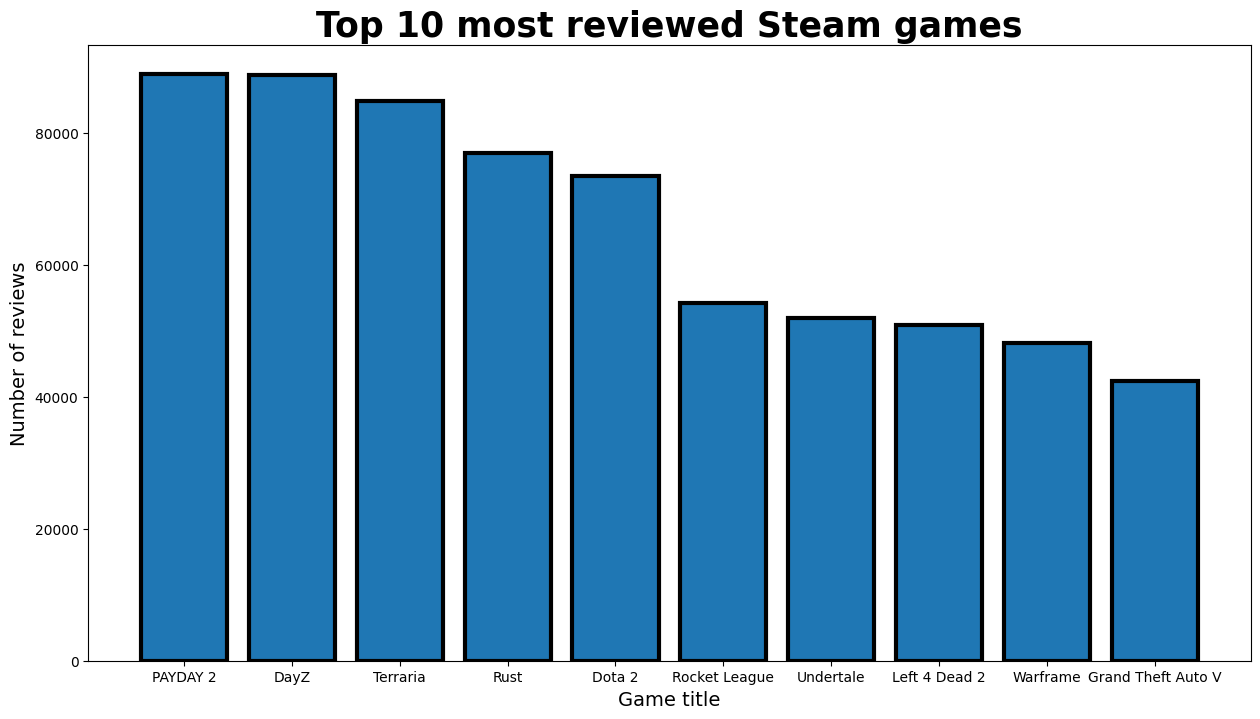

In [3]:
# set up the bar graph
plt.figure(figsize=(15, 8))
barlist = plt.bar(range(0, 10), top_10_games['review_count'], ec='black', lw=3)
plt.xticks(range(10), top_10_games['app_name'])

# label
plt.title('Top 10 most reviewed Steam games', weight='bold', size=25)
plt.xlabel('Game title', size=14)
plt.ylabel('Number of reviews', size=14)

plt.show()